In [1]:
using OrdinaryDiffEq, Plots
gr()

┌ Info: Recompiling stale cache file C:\Users\ares\.julia\compiled\v1.0\OrdinaryDiffEq\DlSvy.ji for OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1190


Plots.GRBackend()

### Simple pendulum

$$\ddot{\theta} + \frac{g}{L}{\sin \theta} = 0$$

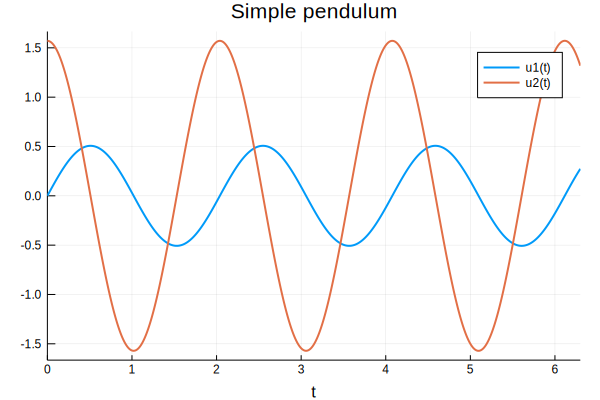

In [10]:
const g = 9.81
L = 1.0 # length
u₀ = [0,π/2]
tspan = (0.0,6.3)

#Define the problem
function simplependulum(du,u,p,t)
    θ  = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*sin(θ)
end

#Pass to solvers
prob = ODEProblem(simplependulum,u₀, tspan)
sol = solve(prob,Tsit5())


plot(sol, linewidth=2, title="Simple pendulum")

In [13]:
p = plot(sol,vars = (1,2), xlims = (-9,9), title = "Phase Space Plot", xaxis = "Velocity", yaxis = "Position", leg=false)
function phase_plot(prob, u0, p, tspan=2pi)
    _prob = ODEProblem(prob.f,u0,(0.0,tspan))
    sol = solve(_prob,Vern9()) # Use Vern9 solver for higher accuracy
    plot!(p,sol,vars = (1,2), xlims = nothing, ylims = nothing)
end
for i in -4pi:pi/2:4π
    for j in -4pi:pi/2:4π
        phase_plot(prob, [j,i], p)
    end
end
plot(p,xlims = (-9,9))

### Double pendulum

In [31]:
const m₁, m₂, L₁, L₂ = 1, 2, 1, 2
initial = [0, π/3, 0, 3pi/5]
tspan = (0., 50.)

function polar2cart(sol;dt=0.02,l1=L₁,l2=L₂+1,vars=(2,4))
    u = sol.t[1]:dt:sol.t[end]

    p1 = l1*map(x->x[vars[1]], sol.(u))
    p2 = l2*map(y->y[vars[2]], sol.(u))

    x1 = l1*sin.(p1)
    y1 = l1*-cos.(p1)
    (u, (x1 + l2*sin.(p2),
     y1 - l2*cos.(p2)))
end

#Define the Problem
function double_pendulum(xdot,x,p,t)
    xdot[1]=x[2]
    xdot[2]=-((g*(2*m₁+m₂)*sin(x[1])+m₂*(g*sin(x[1]-2*x[3])+2*(L₂*x[4]^2+L₁*x[2]^2*cos(x[1]-x[3]))*sin(x[1]-x[3])))/(2*L₁*(m₁+m₂-m₂*cos(x[1]-x[3])^2)))
    xdot[3]=x[4]
    xdot[4]=(((m₁+m₂)*(L₁*x[2]^2+g*cos(x[1]))+L₂*m₂*x[4]^2*cos(x[1]-x[3]))*sin(x[1]-x[3]))/(L₂*(m₁+m₂-m₂*cos(x[1]-x[3])^2))
end

#Pass to Solvers
double_pendulum_problem = ODEProblem(double_pendulum, initial, tspan)
sol = solve(double_pendulum_problem, Vern7(), abs_tol=1e-10, dt=0.05);

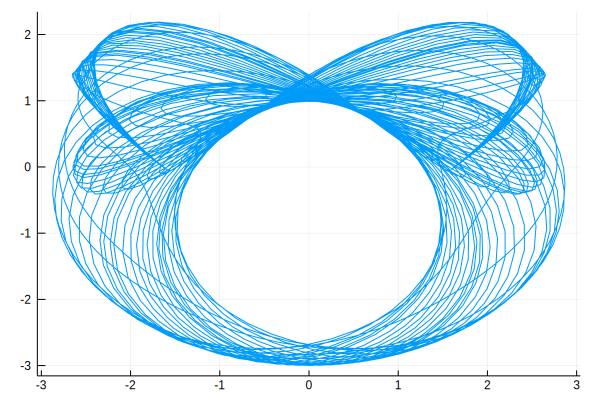

In [41]:
ts, ps = polar2cart(sol, l1=L₁, l2=L₂, dt=0.02)
plot(ps..., legend=:none)